### Install libraries

In [1]:
!pip install -q transformers[torch] datasets
!pip install simpletransformers
!pip install datasets
!pip install ipywidgets
!pip install --upgrade huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.5 

In [2]:
import torch
import random
import numpy as np

torch.manual_seed(7)
torch.cuda.manual_seed(7)
torch.cuda.manual_seed_all(7)
np.random.seed(7)
random.seed(7)

## Import dataset

In [3]:
from google.colab import drive
# mount your google drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/TFG/AuTexTification/subtask_1/en')

import pickle
with open("dict_dataset.pkl", "rb") as myFile:
    dict_dataset = pickle.load(myFile)

train_dataset = dict_dataset['train']
val_dataset = dict_dataset['validation']
test_dataset = dict_dataset['test']

Mounted at /content/drive


In [4]:
val_dataset

Dataset({
    features: ['text', 'label', 'domain', '__index_level_0__'],
    num_rows: 6769
})

In [5]:
val_dataset['text']

['@miss_tattoo LOL! cuuuute! how did the M&amp;G go? Im sooo happy danny loved your book! I texted',
 'When you start seeing signs that he may be a girl or boy at this time, make sure to get in touch with your doctor for advice. Your pregnancy will only last about four months and there are some changes taking place as you progress through gestation. The more information you can have on these events during the first trimester, the better prepared youll feel when they happen!',
 'sneaked on :O Really dont wanna go to work, im scared theyll be mean and ruin my day. i want to play',
 '@waytobe what measure or controlling mechanism do you have to ensure that the quality of your sales is just as good as',
 'Just a question. Are hot air balloons a good choice for branding on #bing Mi Read More: http://is.',
 'aha! photos done studying.. not so sure who to send it to so Ill send it to you ;)',
 'If you notice any of these, its likely that you need to bring your pet in: Not sleeping well – your

# Models
Access trained models from Hugging Face Hub

In [ ]:
# Define transformers' initialization dictionary
models = {
    "albert_base_v2": {
        "model_type": "albert",
        "model_name": "luciayn/albert_base_v2"
    },
    "ai-generated-text-classification": {
        "model_type": "roberta",
        "model_name": "luciayn/ai-generated-text-classification"
    },
    "openai-community_roberta-base-openai-detector": {
        "model_type": "roberta",
        "model_name": "luciayn/openai-community_roberta-base-openai-detector"
    },
    "distilbert_base_uncased": {
        "model_type": "distilbert",
        "model_name": "luciayn/distilbert_base_uncased"
    },
    "human-vs-llm-generated-text-detection-distilbert": {
        "model_type": "distilbert",
        "model_name": "luciayn/human-vs-llm-generated-text-detection-distilbert"
    }
}

In [ ]:
from transformers import AutoModelForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

classification_models = {}
# Define a dictionary where each key matches its corresponding transformer
for model,_ in models.items():
  classification_models[model] = AutoModelForSequenceClassification.from_pretrained(f"luciayn/{model}").to(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/946 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.7M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/952 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/672 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

In [ ]:
classification_models.keys()

dict_keys(['albert_base_v2', 'ai-generated-text-classification', 'openai-community_roberta-base-openai-detector', 'distilbert_base_uncased', 'human-vs-llm-generated-text-detection-distilbert'])

# Evaluation of each model on Validation Dataset


In [ ]:
from transformers import AutoTokenizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def get_prediction(text, max_length, tokenizer, model):
    # prepara el texto, aplicamos la misma tokenización que la utilizada en el training
    inputs = tokenizer(text, padding="max_length", max_length=max_length, truncation= True, return_tensors="pt").to(device)
    # aplicamos el modelo
    pred = model(**inputs).logits
    # obtenemos la probabilidad para cada clase
    probs = pred.softmax(1)
    # devolvemos la mayor
    return probs.argmax().item()

def compute_metrics(y_true, y_pred):
  precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average='binary')
  acc = accuracy_score(y_true, y_pred)
  return {
      'accuracy': round(acc, 5),
      'f1': round(f1, 5),
      'precision': round(precision, 5),
      'recall': round(recall, 5)
  }

In [ ]:
# Transformers' evaluation under the validation set
model_evaluation = {}
for model_name in list(classification_models.keys()):
  model_evaluation[model_name] = {}
  tokenizer = AutoTokenizer.from_pretrained(f"luciayn/{model_name}")
  max_length = max([len(tokenizer(text).input_ids) for text in dict_dataset['train']['text']])
  # Storing the prediction outputs
  model_evaluation[model_name]['validation_predictions']=[get_prediction(text, max_length, tokenizer, classification_models[model_name]) for text in dict_dataset['validation']['text']]
  # True label values
  y_true = dict_dataset['validation']['label']
  # Storing the metrics
  model_evaluation[model_name]['metrics'] = compute_metrics(y_true, model_evaluation[model_name]['validation_predictions'])
  print(f"{model_name}\t", model_evaluation[model_name].get("metrics"))


tokenizer_config.json:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

albert_base_v2	 {'accuracy': 0.92879, 'f1': 0.92928, 'precision': 0.92956, 'recall': 0.92901}


tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/958 [00:00<?, ?B/s]

ai-generated-text-classification	 {'accuracy': 0.91535, 'f1': 0.90992, 'precision': 0.98035, 'recall': 0.84893}


tokenizer_config.json:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

openai-community_roberta-base-openai-detector	 {'accuracy': 0.91535, 'f1': 0.90992, 'precision': 0.98035, 'recall': 0.84893}


tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

distilbert_base_uncased	 {'accuracy': 0.91343, 'f1': 0.9096, 'precision': 0.95932, 'recall': 0.86477}


tokenizer_config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/669k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

human-vs-llm-generated-text-detection-distilbert	 {'accuracy': 0.91668, 'f1': 0.91312, 'precision': 0.9614, 'recall': 0.86946}


# Ensembles
Create a dictionary containing each individual ensemble.

In [ ]:
import collections
from itertools import combinations

# Define a list containing the lists of models of each ensemble
models_names = list(classification_models.keys())
ensembles_list = list()

# Store the different combinations of models, starting from length 1 up to the total number of models (5 in our case)
for i in range(1, len(models_names) + 1):
    ensembles_list += list(combinations(models_names, i))
ensembles_list = [list(ensemble) for ensemble in ensembles_list]

# Define a dictionary with the ensembles
ensembles = {}
for i in range(len(ensembles_list)):
  ensembles["ensemble{:02d}".format(i)] = {}
  ensembles["ensemble{:02d}".format(i)]["models"] = ensembles_list[i]
  ensembles["ensemble{:02d}".format(i)]["metrics"] = {}
ensembles

{'ensemble00': {'models': ['albert_base_v2'], 'metrics': {}},
 'ensemble01': {'models': ['ai-generated-text-classification'], 'metrics': {}},
 'ensemble02': {'models': ['openai-community_roberta-base-openai-detector'],
  'metrics': {}},
 'ensemble03': {'models': ['distilbert_base_uncased'], 'metrics': {}},
 'ensemble04': {'models': ['human-vs-llm-generated-text-detection-distilbert'],
  'metrics': {}},
 'ensemble05': {'models': ['albert_base_v2',
   'ai-generated-text-classification'],
  'metrics': {}},
 'ensemble06': {'models': ['albert_base_v2',
   'openai-community_roberta-base-openai-detector'],
  'metrics': {}},
 'ensemble07': {'models': ['albert_base_v2', 'distilbert_base_uncased'],
  'metrics': {}},
 'ensemble08': {'models': ['albert_base_v2',
   'human-vs-llm-generated-text-detection-distilbert'],
  'metrics': {}},
 'ensemble09': {'models': ['ai-generated-text-classification',
   'openai-community_roberta-base-openai-detector'],
  'metrics': {}},
 'ensemble10': {'models': ['ai-

In [ ]:
ensembles_list

[['albert_base_v2'],
 ['ai-generated-text-classification'],
 ['openai-community_roberta-base-openai-detector'],
 ['distilbert_base_uncased'],
 ['human-vs-llm-generated-text-detection-distilbert'],
 ['albert_base_v2', 'ai-generated-text-classification'],
 ['albert_base_v2', 'openai-community_roberta-base-openai-detector'],
 ['albert_base_v2', 'distilbert_base_uncased'],
 ['albert_base_v2', 'human-vs-llm-generated-text-detection-distilbert'],
 ['ai-generated-text-classification',
  'openai-community_roberta-base-openai-detector'],
 ['ai-generated-text-classification', 'distilbert_base_uncased'],
 ['ai-generated-text-classification',
  'human-vs-llm-generated-text-detection-distilbert'],
 ['openai-community_roberta-base-openai-detector', 'distilbert_base_uncased'],
 ['openai-community_roberta-base-openai-detector',
  'human-vs-llm-generated-text-detection-distilbert'],
 ['distilbert_base_uncased',
  'human-vs-llm-generated-text-detection-distilbert'],
 ['albert_base_v2',
  'ai-generated-t

We do not need to train the models since we already have trained them before.

# Best Ensemble

The vote function determines the ensembler prediction based on the outcomes of its transformers. Its arguments are:

- predictions: list of transformers' (raw) outputs
- weighted: bool that determines if a weighted voting system must be used
- weights: list of weights (normalized F1-scores)

The predict_ensemble function calculates the predictions of each ensemble for a given dataset split (dataset_name, dataset).

Execute the predicted labels for each validation instance for each ensemble.

In [ ]:
from sklearn.preprocessing import normalize
from torch.utils.data import DataLoader

# Function which determines the ensembler prediction based on its transformers' predictions.
# A weighted voting system may be used
def vote(predictions, weighted=False, weights=None):
  voting = sum(predictions * weights) if weighted else sum(predictions)/len(predictions)
  return 0 if voting < 0.5 else 1

ensemble_evaluation = {}

# Function to predict the label of the instances in a dataset split (validation ("val") or test ("test")) for each ensemble
def predict_ensemble(ensemble_name, dataset_name, dataset, weighted=False):
  ensemble_evaluation[ensemble_name][f"{dataset_name}_predictions"] = list()
  # Traverse each dataset instance
  for i in range(len(DataLoader(dataset, shuffle=False))):
    predictions = list()
    ensemble_models = ensembles[ensemble_name].get("models")
    # Get the raw output of each model in the ensemble for the instance at hand
    for model_name in ensemble_models:
      curr_model_outputs = model_evaluation[model_name].get(f"{dataset_name}_predictions")
      predictions.append(curr_model_outputs[i])

    # Define the list of weights if a weighted voting system must be used
    weights = list()
    if weighted:
      # The weights' list is obtained by normalizing the F1-scores of the models in the ensemble
      f1_scores_list = [model_evaluation[model_name]["metrics"].get("f1")
                        for model_name in ensembles[ensemble_name].get("models")]
      weights = normalize([f1_scores_list], norm="l1")[0]

    # Append the predicted label to the predictions of the ensemble
    ensemble_pred = vote(predictions, weighted, weights)
    ensemble_evaluation[ensemble_name][f"{dataset_name}_predictions"].append(ensemble_pred)

# Ensembles' evaluation under the validation set
for ensemble_name in ensembles:
  ensemble_evaluation[ensemble_name] = {}
  ensemble_evaluation[ensemble_name]["validation_predictions"] = list()
  predict_ensemble(ensemble_name, "validation", dict_dataset['validation'], weighted=True) # weighted=False
  ensembles[ensemble_name]["metrics"] = compute_metrics(dict_dataset['validation']['label'], ensemble_evaluation[ensemble_name].get("validation_predictions"))
  print(f"{ensemble_name}\t", ensembles[ensemble_name].get("metrics"))

ensemble00	 {'accuracy': 0.92879, 'f1': 0.92928, 'precision': 0.92956, 'recall': 0.92901}
ensemble01	 {'accuracy': 0.91535, 'f1': 0.90992, 'precision': 0.98035, 'recall': 0.84893}
ensemble02	 {'accuracy': 0.91535, 'f1': 0.90992, 'precision': 0.98035, 'recall': 0.84893}
ensemble03	 {'accuracy': 0.91343, 'f1': 0.9096, 'precision': 0.95932, 'recall': 0.86477}
ensemble04	 {'accuracy': 0.91668, 'f1': 0.91312, 'precision': 0.9614, 'recall': 0.86946}
ensemble05	 {'accuracy': 0.92879, 'f1': 0.92928, 'precision': 0.92956, 'recall': 0.92901}
ensemble06	 {'accuracy': 0.92879, 'f1': 0.92928, 'precision': 0.92956, 'recall': 0.92901}
ensemble07	 {'accuracy': 0.92879, 'f1': 0.92928, 'precision': 0.92956, 'recall': 0.92901}
ensemble08	 {'accuracy': 0.92879, 'f1': 0.92928, 'precision': 0.92956, 'recall': 0.92901}
ensemble09	 {'accuracy': 0.91535, 'f1': 0.90992, 'precision': 0.98035, 'recall': 0.84893}
ensemble10	 {'accuracy': 0.91535, 'f1': 0.90992, 'precision': 0.98035, 'recall': 0.84893}
ensemble11	 

In [ ]:
import json

# Save ensembles to JSON file
with open('/content/drive/My Drive/TFG/AuTexTification/subtask_1/en/ensembles.json', 'w', encoding='utf-8') as f:
    json.dump(ensembles, f, ensure_ascii=False, indent=4)

Given that it is a binary classification task, the best ensemble will be that with a maximum F1-score.

In [ ]:
# Defining a dictionary with the F1-score of each ensemble
f1_scores = {ensemble_name: ensembles[ensemble_name]["metrics"].get("f1") for ensemble_name in ensemble_evaluation}
# Selecting the best ensemble
best_ensemble_name = max(f1_scores, key=f1_scores.get)
best_ensemble = {"name": best_ensemble_name,
                 "models": ensembles[best_ensemble_name].get("models"),
                 "metrics": ensembles[best_ensemble_name].get("metrics")
                 }

best_ensemble

{'name': 'ensemble27',
 'models': ['albert_base_v2',
  'ai-generated-text-classification',
  'distilbert_base_uncased',
  'human-vs-llm-generated-text-detection-distilbert'],
 'metrics': {'accuracy': 0.93515,
  'f1': 0.93376,
  'precision': 0.96147,
  'recall': 0.9076}}

# Predictions on test set

In [ ]:
# Predicting the label of the test set's instances with each individual transformer
for model_name in models_names:
  tokenizer = AutoTokenizer.from_pretrained(f'luciayn/{model_name}')
  model_evaluation[model_name]['test_predictions']=[get_prediction(text, max_length, tokenizer, classification_models[model_name]) for text in dict_dataset['test']['text']]
  # model_predictions, model_raw_outputs = models.get(model_name).predict(dict_dataset['test']['text'].tolist())
  # model_evaluation[model_name]["test_model_outputs"] = model_raw_outputs
  # model_evaluation[model_name]["test_predictions"] = [0 if output < 0.5 else 1 for output in model_raw_outputs]

# Calculating the test predictions of the best ensemble
predict_ensemble(best_ensemble.get('name'), 'test', dict_dataset['test'], weighted=True) # weighted=False

In [ ]:
# Dump individual transformers' results
for model_name, evaluation in model_evaluation.items():

  # Converting ndarrays to lists
  model_evaluation[model_name]["validation_predictions"] = list(model_evaluation[model_name].get("validation_predictions"))
  model_evaluation[model_name]["test_predictions"] = list(model_evaluation[model_name].get("test_predictions"))

  with open(f'/content/drive/My Drive/TFG/AuTexTification/subtask_1/en/{model_name}/model-evaluation.json', 'w', encoding='utf-8') as f:
    json.dump(model_evaluation[model_name], f, ensure_ascii=False, indent=4)

In [ ]:
# Complete fields of best ensemble dictionary
best_ensemble["validation_predictions"] = ensemble_evaluation[best_ensemble.get('name')].get("validation_predictions")
best_ensemble["test_predictions"] = ensemble_evaluation[best_ensemble.get('name')].get("test_predictions")

# Save best ensemble to JSON file
with open('/content/drive/My Drive/TFG/AuTexTification/subtask_1/en/best-ensemble.json', 'w', encoding='utf-8') as f:
    json.dump(best_ensemble, f, ensure_ascii=False, indent=4)

In [ ]:
import pandas as pd

# Convert the test dataset to a DataFrame
test_df = pd.DataFrame(dict_dataset['test'])

# Add a new column of predicted labels
test_df['predicted_label'] = ensemble_evaluation[best_ensemble.get('name')].get('test_predictions')

# Display the first 10 rows of the DataFrame
print(test_df.head(10))

                                                text  label   domain  \
0  It has remained one of my favorite country/swi...      1  reviews   
1  Even with very light use (hard to get motivate...      1  reviews   
2  She died in 2015 at age 93. She is survived by...      0     news   
3  Londonderry Crown Court heard how Heaney false...      1     news   
4  Will Genia, Lachie Turner and Berrick Barnes e...      1     news   
5  Im not even sure where to start. The plot is c...      0  reviews   
6  The right part came and was a day early, Chris...      1  reviews   
7  He was one of three victims who died following...      0     news   
8  This is very durable. This is very easy to ass...      0  reviews   
9  They raped numerous women at the stadium and t...      1     news   

   predicted_label  
0                1  
1                1  
2                0  
3                0  
4                1  
5                0  
6                1  
7                0  
8                0

In [ ]:
# Dump test predictions
test_df.to_csv('/content/drive/My Drive/TFG/AuTexTification/subtask_1/en/test-predictions.csv', index=False)

## Classification report

In [10]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_true=test_df['label']
y_pred=test_df['predicted_label']

# Classification report
labels = ['Generated', 'Human']
print(classification_report(y_true, y_pred, target_names=labels))

              precision    recall  f1-score   support

   Generated       0.63      0.99      0.77     11190
       Human       0.98      0.39      0.56     10642

    accuracy                           0.70     21832
   macro avg       0.80      0.69      0.66     21832
weighted avg       0.80      0.70      0.67     21832



[[11104    86]
 [ 6512  4130]]


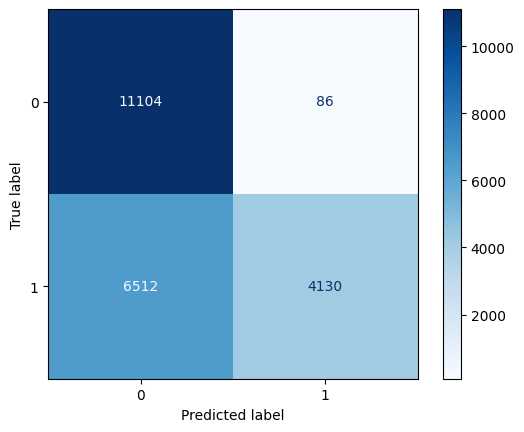

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_true, y_pred))
disp=ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap=plt.cm.Blues)

<ipython-input-23-c1c7f8e62dd0>:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], "k--", color = "darkblue", linestyle = "--", label = "Random Classifier (AUC = 0.5)") # AUC: Area Under Curve
<ipython-input-23-c1c7f8e62dd0>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], "k--", color = "darkblue", linestyle = "--", label = "Random Classifier (AUC = 0.5)") # AUC: Area Under Curve


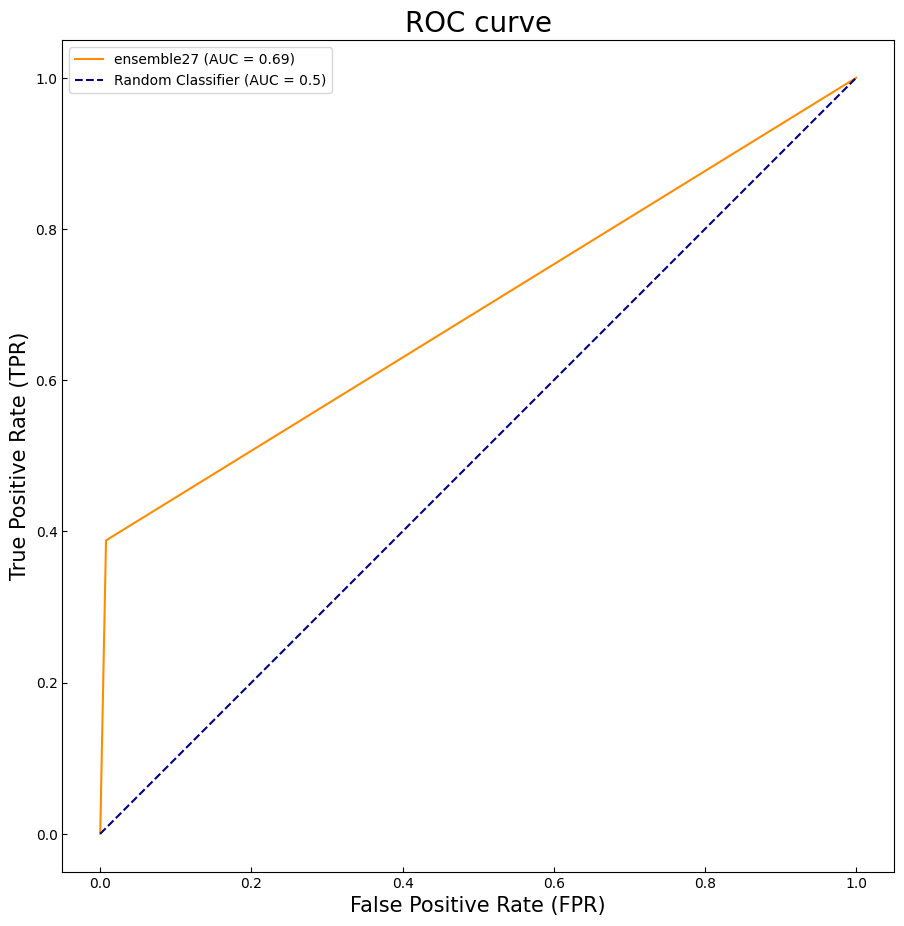

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fig_roc = plt.figure(figsize = (10.8, 10.8))
fpr, tpr, _ = roc_curve(test_df["label"], test_df["predicted_label"])
plt.plot(fpr, tpr, color = "darkorange", label = "{} (AUC = {:0.2f})".format(best_ensemble.get("name"), auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], "k--", color = "darkblue", linestyle = "--", label = "Random Classifier (AUC = 0.5)") # AUC: Area Under Curve
plt.axis("square")
plt.xlabel("False Positive Rate (FPR)", fontsize = 15)
plt.ylabel("True Positive Rate (TPR)", fontsize = 15)
plt.title("ROC curve", fontsize = 20)
plt.tick_params(axis = "y",direction = "in")
plt.tick_params(axis = "x",direction = "in")
plt.legend()

# # Save ROC curve
# fig_roc.savefig(os.path.join(PATH, "ROC.png"))
plt.show()